# Homework 5 Solutions

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import matplotlib.cm as cm

In [36]:
import numpy as np
def b_wire(x, y):
    """
    Finds the magnetic field at point 'x' from a wire of current 'I' located at the origin.
    """
    I = -10    #Current in the wire (A) possitive current is out of the page, negative current is in the page
    mu = 4*np.pi*10**-7 #permeability of free space (H/m or T⋅m/A)
    s = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x) #Remember arctan2 has inputs (y,x) for some reason.
    b_field = mu*I / (2*np.pi * s) * np.array([-np.sin(theta), np.cos(theta)])
    return b_field

In [37]:
b_wire(0.01,.01)

array([ 1.e-04, -1.e-04])

In [38]:
import numpy as np
import matplotlib.pyplot as plt
def secret_plot_function(func, x, y, step):
    X, Y = np.mgrid[min(x):max(x):step, min(y):max(y):step]
    U = func(X,Y)
    M = np.sqrt(U[0]**2+U[1]**2) # magnitude
    plt.figure(figsize = (10,10))
    plt.quiver(X, Y, U[0]/M, U[1]/M,M,cmap=plt.cm.plasma)
    cbar = plt.colorbar(format='%.2e')
    cbar.set_label('Magnetic Field (T)', rotation = 270, labelpad=25)
    plt.show()

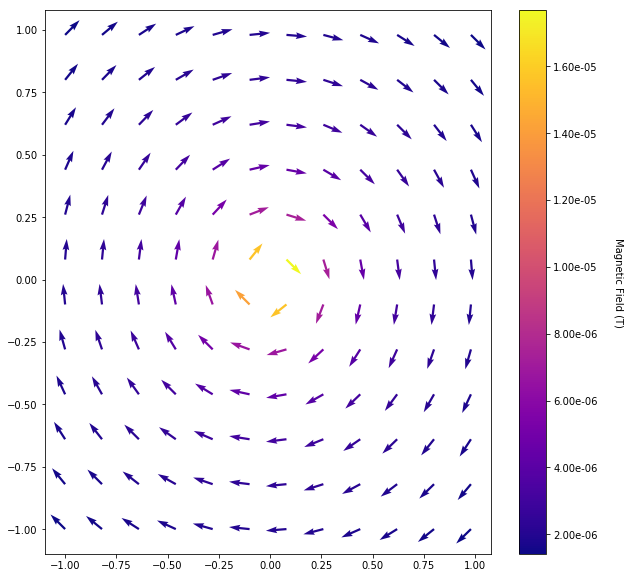

In [39]:
secret_plot_function(b_wire, [-1,1],[-1,1], 0.18)

In [40]:
import numpy as np
def b_wire2(x, w, I):
    """
    Finds the magnetic field at point 'x' from a wire of current 'I' located at point w 
    """ 
    
    mu = 4*np.pi*10**-7
    dx = x[0] - w[0]
    dy = x[1] - w[1]
    s = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx) #Remember arctan2 has inputs (y,x) f
    b_field = mu*I / (2*np.pi * s) * np.array([-np.sin(theta), np.cos(theta)])
    return b_field

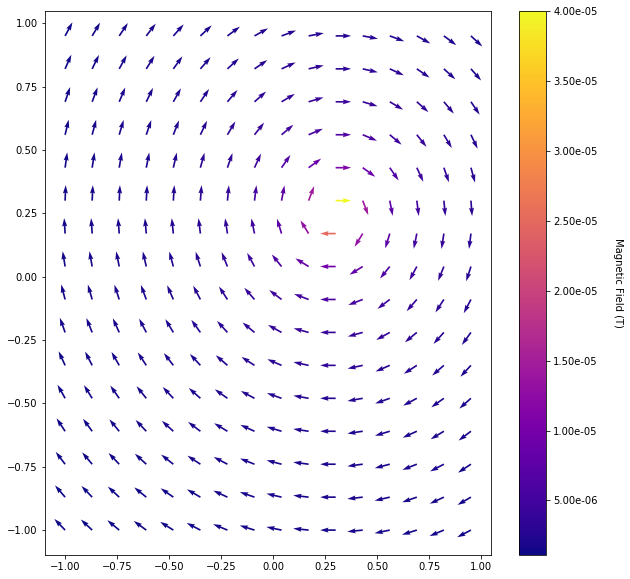

In [41]:
X, Y = np.mgrid[-1:1:.13, -1:1:.13]
U = b_wire2([X,Y], [.3,0.25],-10)
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.figure(figsize = (10,10))
plt.quiver(X, Y, U[0]/M, U[1]/M, M ,cmap=plt.cm.plasma)
cbar = plt.colorbar(format='%.2e')
cbar.set_label('Magnetic Field (T)', rotation = 270, labelpad=25)
plt.show()

In [42]:
def multi_wire_ideal(x):
    """
    Takes a list of possitions and a list of currents and finds the total magnetic field from all of them
    
    Inputs
    ----------
    x:  Place where I want to know the magnetic field. 
        
    Output
    ----------
    b_field: Total magnetic field from all the wires.
    """
    b1 = b_wire2(x, [0,0], -10)
    b2 = b_wire2(x, [0,0.005], 10)
    b3 = b_wire2(x, [0.005, 0], 10)
    b4 = b_wire2(x, [0.005,0.005], -10)
    b_field = b1 + b2 + b3 + b4
    return b_field

In [43]:
def multi_wire_mag_ideal(x):
    B = multi_wire_ideal(x)
    mag = B[0]**2 + B[1]**2
    return mag

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


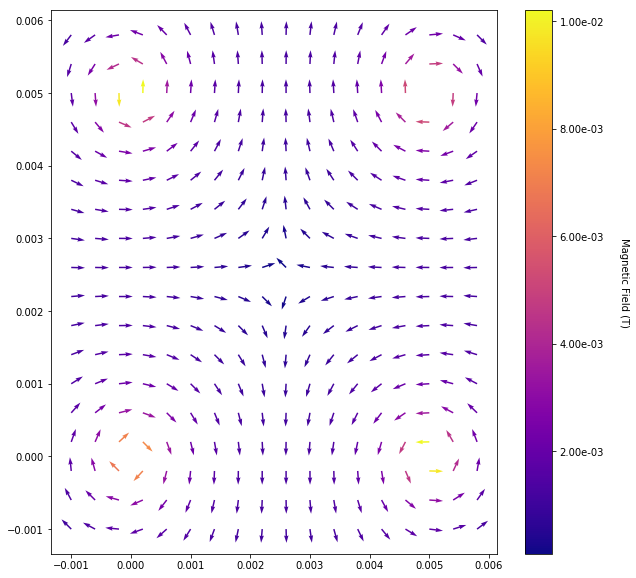

In [44]:
X, Y = np.mgrid[-0.001:0.006:4e-4, -0.001:0.006:4e-4]
U = multi_wire_ideal([X,Y])
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.figure(figsize = (10,10))
plt.quiver(X, Y, U[0]/M, U[1]/M, M ,cmap=plt.cm.plasma)
cbar = plt.colorbar(format='%.2e')
cbar.set_label('Magnetic Field (T)', rotation = 270, labelpad=25)
plt.show()

In [51]:
ans = scipy.optimize.fmin(multi_wire_mag_ideal, [0.001,0.001],xtol = 1e-10,ftol = 1e-12)
ans

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 125


array([0.0025, 0.0025])

In [46]:
def multi_wire_not_ideal(x):
    """
    Takes a list of possitions and a list of currents and finds the total magnetic field from all of them
    
    Inputs
    ----------
    x:  Place where I want to know the magnetic field. 
        
    Output
    ----------
    b_field: Total magnetic field from all the wires.
    """
    b1 = b_wire2(x, [0,0], -9.9)
    b2 = b_wire2(x, [0.07e-2, 0.45e-2], 8.9)
    b3 = b_wire2(x, [0.47e-2,-0.08e-2], 12.4)
    b4 = b_wire2(x, [0.52e-2, 0.43e-2], -10.3)
    b_field = b1 + b2 + b3 + b4
    return b_field

In [47]:
def multi_wire_mag_not_ideal(x):
    B = multi_wire_not_ideal(x)
    mag = B[0]**2 + B[1]**2
    return mag

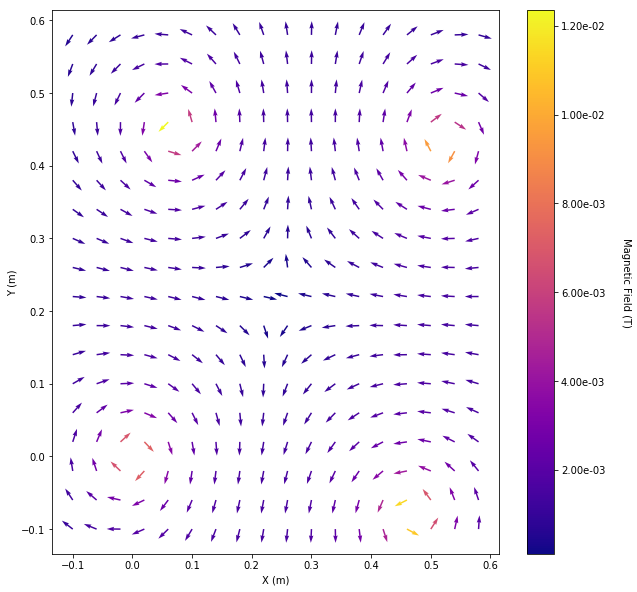

In [53]:
X, Y = np.mgrid[-0.001:0.006:4e-4, -0.001:0.006:4e-4]
U = multi_wire_not_ideal([X,Y])
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.figure(figsize = (10,10))
plt.quiver(X*100, Y*100, U[0]/M, U[1]/M, M ,cmap=plt.cm.plasma)
cbar = plt.colorbar(format='%.2e')
cbar.set_label('Magnetic Field (T)', rotation = 270, labelpad=25)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [54]:
ans = scipy.optimize.fmin(multi_wire_mag_not_ideal, [0.001,0.001],xtol = 1e-12,ftol = 1e-12)
ans

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 150


array([0.00245139, 0.00219703])

In [55]:
multi_wire_not_ideal(ans)

array([ 3.07880891e-14, -1.35809604e-13])